**Problem Statement:**

In this, we have to predict the number of positive and negative reviews based on sentiments by using different classification models.

In [49]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# this is for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#this is bag of words
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /Users/ctsalabs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ctsalabs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ctsalabs/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#import data
# pd.read_csv('/content/IMDB Dataset.csv')

df = pd.read_csv('IMDB Dataset.csv')

In [60]:
df.head()

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode '...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . < br / > < br / ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically 's family little boy ( jake ) think ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visuall...


In [5]:
df.review[69]

'This film laboured along with some of the most predictable story lines and shallow characters ever seen. The writer obviously bought the playbook "How to write a space disaster movie" and followed it play by play. In particular, the stereo-typical use of astronauts talking to their loved ones from outer space - putting on a brave show in the face of disaster - has been done time and time again.<br /><br />Max Q appears to have been written in the hope that the producers would throw $50 million at the project. But, judging by the latter half of the film which contained numerous lame attempts at special effects, the producers could only muster $50 thousand. To learn that the film was nominated for a "Special Visual Effects" Emmy has me absolutely gob-smacked.<br /><br />I think a handful of high school students with a pass in Media Studies could have created more believable effects!<br /><br />And the plot holes are too numerous to mention. But I will pick one out as an example. Now, I\

In [6]:
#the size of the dataset
df.shape

(50000, 2)

<Axes: xlabel='sentiment', ylabel='count'>

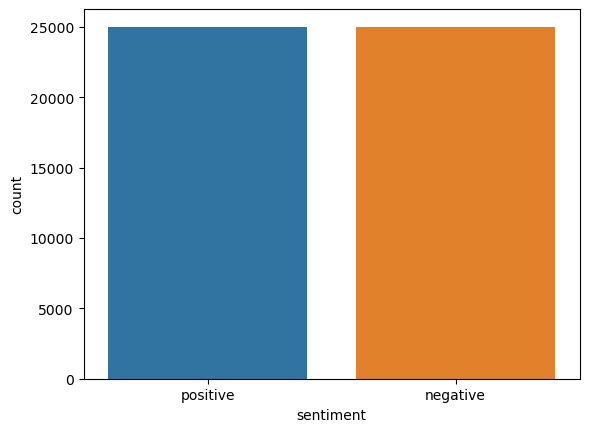

In [8]:
# checking the target
# sns.countplot(df.sentiment);
sns.countplot(data=df, x='sentiment')


In [9]:
df.sentiment.value_counts()

#The dataset is very balance

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [10]:
#dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [12]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [14]:
df[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [ ]:
# we will drop duplicates

In [27]:
#preprocessing step

In [16]:
#dropping duplicates
df = df.drop_duplicates()

In [30]:
#encoding the target
# df['review'] = df.review.replace({'positive':1, 'negative':0})

In [31]:
def preprocess(text):
  """
  This function preprocess the text input and
  return a process list output
  """

  # tokenize the text
  tokens = word_tokenize(text.lower())

  # remove stopword
  stop_words = set(stopwords.words('english'))
  filtered_tokens = [w for w in tokens if not w in stop_words] #using a list comprehension

  #stemming
  # you may want to replace the 2lines of code with that of lemma
  stemmer = PorterStemmer()
  stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]
  
 #lemmatization Assignment implementation
  lemmer = WordNetLemmatizer()
  lemmatised_tokens = [lemmer.lemmatize(w) for w in filtered_tokens]

    

    
    

  #join the tokens back to a string
  #return ' '.join(stemmed_tokens)
  return ' '.join(lemmatised_tokens)

In [ ]:
# stop_words = set(stopwords.words('english'))

# filter_tokens = [w for w in tokens if not w in stop_words] #using a list comprehension

In [ ]:
# not_stop = []
# for i in tokens:
#   if not i in stop_words:
#     not_stop.append(i)

In [ ]:
# for stemming
# stemmer = PorterStemmer()
# stemmed_tokens = [stemmer.stem(w) for w in filtered_tokens]

#for lemmatization
# from nltk.stem import WordNetLemmatizer
# lemmer = WordNetLemmatizer()
# lemmatised_tokens = [lemmer.lemmatize(w) for w in filtered_tokens]

In [ ]:
# stemmed_tokens = []
# for w in filtered_tokens:
#   stemmer.stem(w)

In [24]:
#df.review.apply(preprocess)

In [32]:
# applying the preprocessing to each review
df['processed_review'] = df.review.apply(preprocess)

In [52]:
#df

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch 1 oz episod 'll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product . < br / > < br / > film ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic 's famili littl boy ( jake ) think 's zo...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visual ...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movi right good job . n't creativ orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogu , bad act , idiot direc..."
49997,I am a Catholic taught in parochial elementary...,negative,"cathol taught parochi elementari school nun , ..."
49998,I'm going to have to disagree with the previou...,negative,'m go disagre previou comment side maltin one ...


In [35]:
df

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode '...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . < br / > < br / ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically 's family little boy ( jake ) think ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei 's `` love time money '' visuall...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job . n't creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot , bad dialogue , bad acting , idiotic..."
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,'m going disagree previous comment side maltin...


In [44]:
X=df['processed_review']
y=df['sentiment']

In [45]:
#spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [46]:
#feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(df['processed_review'])
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [47]:
X

0        one reviewer mentioned watching 1 oz episode '...
1        wonderful little production . < br / > < br / ...
2        thought wonderful way spend time hot summer we...
3        basically 's family little boy ( jake ) think ...
4        petter mattei 's `` love time money '' visuall...
                               ...                        
49995    thought movie right good job . n't creative or...
49996    bad plot , bad dialogue , bad acting , idiotic...
49997    catholic taught parochial elementary school nu...
49998    'm going disagree previous comment side maltin...
49999    one expects star trek movie high art , fan exp...
Name: processed_review, Length: 49582, dtype: object

In [61]:
### This code is just explaining TF-IDF

# from sklearn.feature_extraction.text import TfidfVectorizer

# # Sample text data
# text_data = ["Natural language a processing enables computers to understand human language.",
#              "Machine learning is a fascinating field of study and enables AI."]

# # Initialize the TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Fit and transform the text data
# tfidf_matrix = vectorizer.fit_transform(text_data)

# # Convert the tfidf_matrix to an array and print the result
# tfidf_array = tfidf_matrix.toarray()
# # print(tfidf_array)

# # If you want to see the feature names (words) corresponding to each column in the matrix:
# feature_names = vectorizer.get_feature_names_out()
# # print(feature_names)

# # Optionally, create a DataFrame for better readability
# import pandas as pd
# tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)
# tfidf_df

,ai,and,computers,enables,fascinating,field,human,is,language,learning,machine,natural,of,processing,study,to,understand
0,0.000000,0.000000,0.308515,0.219511,0.000000,0.000000,0.308515,0.000000,0.61703,0.000000,0.000000,0.308515,0.000000,0.308515,0.000000,0.308515,0.308515
1,0.324336,0.324336,0.000000,0.230768,0.324336,0.324336,0.000000,0.324336,0.00000,0.324336,0.324336,0.000000,0.324336,0.000000,0.324336,0.000000,0.000000


In [62]:
#HURRAY we are done preprocessing

In [63]:
#selecting the target
#y = df['sentiment']

In [56]:
#training the model
model = MultinomialNB()
# Define hyperparameters grid for tuning
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("best model:", best_model)

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
#model.fit(X_train, y_train)

best model: MultinomialNB()
Test Accuracy: 0.8651810023192498


In [57]:
predictions = best_model.predict(X_test)

In [58]:
predictions

array(['negative', 'positive', 'positive', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [59]:
accuracy_score(y_test, predictions)

0.8651810023192498